In [4]:
from mplfinance.original_flavor import candlestick_ohlc
import math
import pandas as pd
import numpy as np
from pandas_datareader import data
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook

#download data into DataFrame and create moving averages columns
df = data.DataReader('AAPL', 'yahoo', start='1/1/2014', end='1/1/2016')

<IPython.core.display.Javascript object>


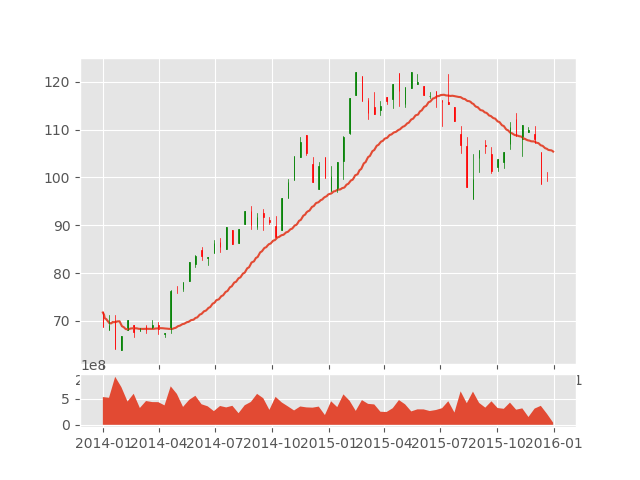

In [8]:
#style.use('ggplot')
#df = pd.read_csv('stock_dfs_handmade/tsla.csv', parse_dates=True, index_col=0)

df_ohlc = df['Adj Close'].resample('10D').ohlc()     # resample-> shrink size
df_volume = df['Volume'].resample('10D').sum()       # or mean

df_ohlc.reset_index(inplace=True)

df_ohlc['Date'] = df_ohlc['Date'].map(date2num)
%matplotlib notebook
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.xaxis_date()
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
ax1.plot(df.index, df['100ma'])
candlestick_ohlc(ax1, df_ohlc.values, width=1, colorup='g')

ax2.fill_between(df_volume.index.map(date2num), df_volume.values, 0)
